### Poland Presidential Elections 2020

The goal of this notebook is to provide some visualisation for the Polish 2020 presidential elections. 

Source: https://prezydent20200628.pkw.gov.pl/prezydent20200628/pl/dane_w_arkuszach

### Importing necessary packages

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

### Loading the data

In [2]:
df = pandas.read_csv("..\\data\\1st round\\wyniki_gl_na_kand_po_powiatach_proc_utf8.csv", delimiter=";", decimal=",")
df.head()

,Nr OKW,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,% głosów ważnych,...,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
0,2,20100,bolesławiecki,dolnośląskie,60.09,0.39,36.48,63.52,0.0,99.61,...,41.56,16.39,0.13,1.54,0.07,0.12,31.03,0.13,0.24,63
1,4,20200,dzierżoniowski,dolnośląskie,58.95,0.34,35.22,64.78,0.0,99.66,...,44.03,13.67,0.12,1.48,0.10,0.18,31.87,0.10,0.19,83
2,3,20300,głogowski,dolnośląskie,62.57,0.29,30.65,69.35,0.0,99.71,...,44.19,14.21,0.10,1.75,0.10,0.14,30.94,0.10,0.20,53
3,1,20400,górowski,dolnośląskie,54.05,0.27,27.50,72.50,0.0,99.73,...,50.04,13.14,0.14,2.59,0.08,0.10,25.49,0.07,0.15,23
4,2,20500,jaworski,dolnośląskie,58.95,0.39,38.04,61.96,0.0,99.61,...,47.78,11.18,0.12,3.08,0.12,0.09,28.77,0.06,0.19,39


I don't think I will need the first two columns as they relate to territory code, as well as the columns related to the cause of ballot invalidation.

In [3]:
df = df.drop(df.columns[[0,1,6,7,8]], axis=1)

### Loading the geodata

In [4]:
powiat_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Powiaty\\Powiaty.shp", encoding="utf-8")
woj_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Wojewodztwa\\Województwa.shp", encoding="utf-8")

In [5]:
powiat_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,POW,1815,powiat ropczycko-sędziszowski,NaN,13415,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1815,NaN,NaN,UZG,0,829084,NaN,1.776163,0.068825,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."
1,POW,1410,powiat łosicki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1410,NaN,NaN,UZG,0,829095,NaN,2.220227,0.101595,"POLYGON ((22.72381 52.28039, 22.72379 52.28043..."
2,POW,1418,powiat piaseczyński,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1418,NaN,NaN,UZG,0,829103,NaN,1.947858,0.081285,"POLYGON ((21.11010 52.11317, 21.10875 52.11459..."
3,POW,1425,powiat radomski,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1425,NaN,NaN,UZG,0,829110,NaN,4.427170,0.197463,"POLYGON ((20.98915 51.48947, 20.98919 51.48942..."
4,POW,1427,powiat sierpecki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1427,NaN,NaN,UZG,0,829112,NaN,2.138918,0.113594,"POLYGON ((19.50876 52.86784, 19.50873 52.86795..."


I can see that I will be able to join the geo dataframe with the voting data using the column *JPT_NAZWA_* as it contains the name of the subdivision. It's only a matter of stripping *powiat* from the values of *JPT_NAZWA_*.

In [6]:
powiat_df["JPT_NAZWA_"] = powiat_df["JPT_NAZWA_"].map(lambda x: x.lstrip('powiat').strip())
powiat_df["JPT_NAZWA_"] = powiat_df["JPT_NAZWA_"].astype(str)
df["Powiat"] = df["Powiat"].astype(str)

Before I do that, though, a thing to keep in mind is that there are two subdivisions (*powiats*) with the same name.

In [7]:
df.loc[(df.Powiat == "krośnieński") & (df.Województwo == "podkarpackie")]

,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,Robert BIEDROŃ,Krzysztof BOSAK,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
199,krośnieński,podkarpackie,63.31,0.27,99.73,1.58,8.97,63.72,8.96,0.19,2.34,0.09,0.09,13.74,0.07,0.25,106


In [8]:
df.loc[(df.Powiat == "krośnieński") & (df.Województwo == "lubuskie")]

,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,Robert BIEDROŃ,Krzysztof BOSAK,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
78,krośnieński,lubuskie,58.26,0.33,99.67,1.94,5.47,33.82,22.99,0.11,2.04,0.06,0.13,33.21,0.06,0.17,50


It would be reasonable to change one of the names to prevent them from mixing up. I'll restore the name of the *powiat* in the *Lublin* voivodeship to its previous name.

In [9]:
df.loc[(df.Powiat == "krośnieński") & (df.Województwo == "lubuskie"), "Powiat"] = "krosieński"
powiat_df.loc[(powiat_df.JPT_NAZWA_ == "krośnieński") & (powiat_df.JPT_KOD_JE == "0802"), "JPT_NAZWA_"] = "krosieński"


I then join the *powiat* geodata with the dataframe containing the votes.

In [10]:
merged_df = powiat_df.set_index("JPT_NAZWA_").join(df.set_index("Powiat"))
merged_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
JPT_NAZWA_,,,,,,,,,,,,,,,,,,,,,
Biała Podlaska,POW,0661,NaN,13411,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,46.85,15.03,0.23,2.34,0.19,0.15,24.93,0.09,0.26,29
Białystok,POW,2061,NaN,13418,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,38.29,22.39,0.21,1.36,0.11,0.16,26.50,0.14,0.29,185
Bielsko-Biała,POW,2461,NaN,13421,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,36.99,15.89,0.18,1.60,0.13,0.16,35.66,0.15,0.22,76
Bydgoszcz,POW,0461,NaN,13424,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,31.23,17.09,0.13,1.72,0.09,0.16,40.73,0.14,0.25,204
Bytom,POW,2462,NaN,13421,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,38.33,16.29,0.15,1.86,0.11,0.17,33.11,0.17,0.25,81


### Visualisation

Firstly I'll make a visualisation of the voter turnout. Let's start by printing some info regarding where the turnout was the highest..

In [11]:
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,statki,97.36
mazowieckie,zagranica,83.18
mazowieckie,pruszkowski,75.15


Interesting. The data includes votes cast on ships at sea. It also counts the votes from abroad towards *Mazowieckie* province. I do think this high turnout will obfuscate results on the map, so I'll remove it from the dataframe.

In [12]:
df = df[df.Frekwencja < 80]
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,pruszkowski,75.15
mazowieckie,Warszawa,74.40
pomorskie,Sopot,74.30


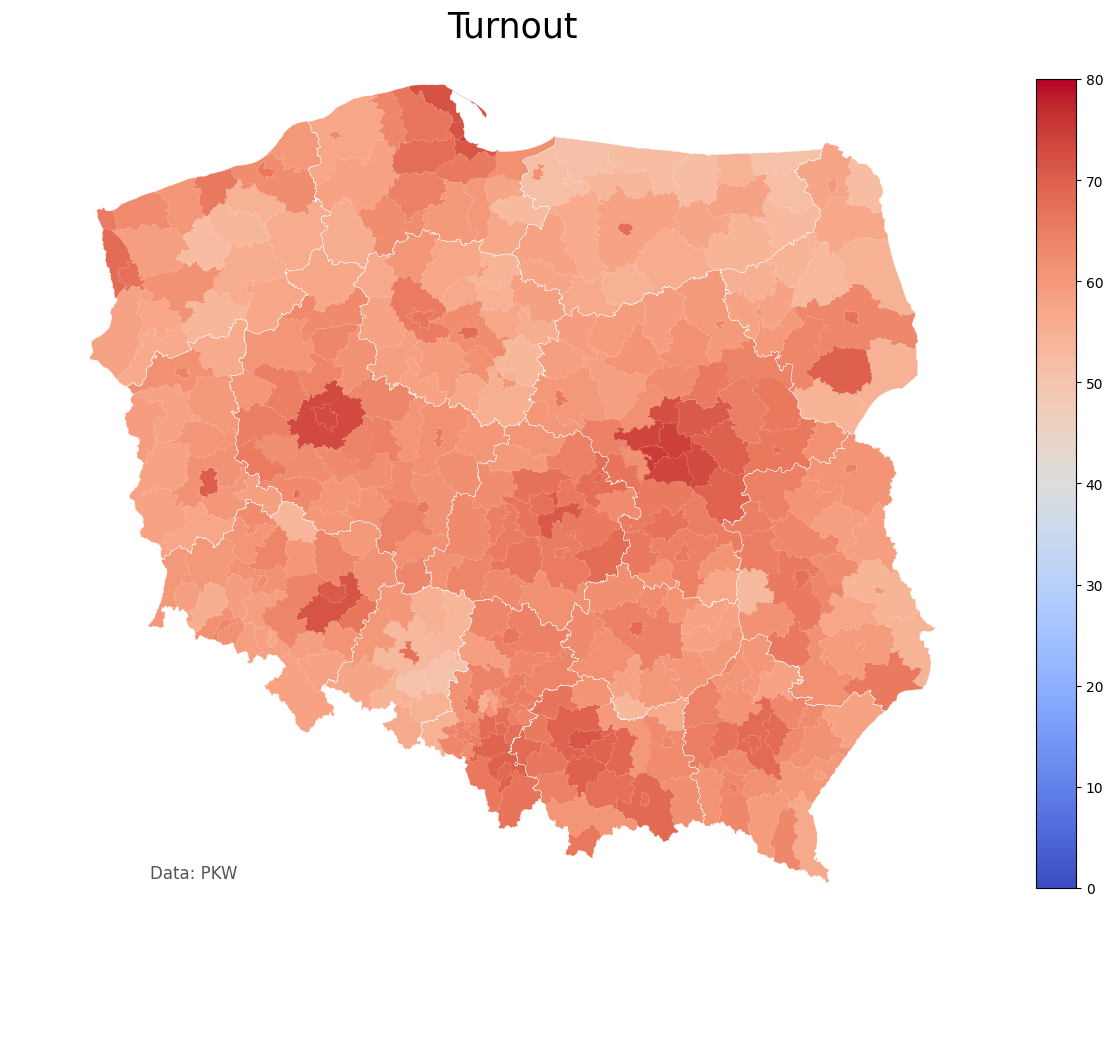

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Turnout", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
turnout_vmax = float(df['Frekwencja'].max())
scalarmappable = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=80))
cbar = fig.colorbar(scalarmappable, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Frekwencja", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=80);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Turnout 1st round", dpi=200, bbox_inches='tight')

I'll now do the same with invalid ballots

In [14]:
display(HTML(df.nlargest(3, "% głosów nieważnych").to_html(columns=['Województwo', 'Powiat', '% głosów nieważnych'], index=False)))

Województwo,Powiat,% głosów nieważnych
mazowieckie,pułtuski,0.56
mazowieckie,przysuski,0.49
opolskie,głubczycki,0.49


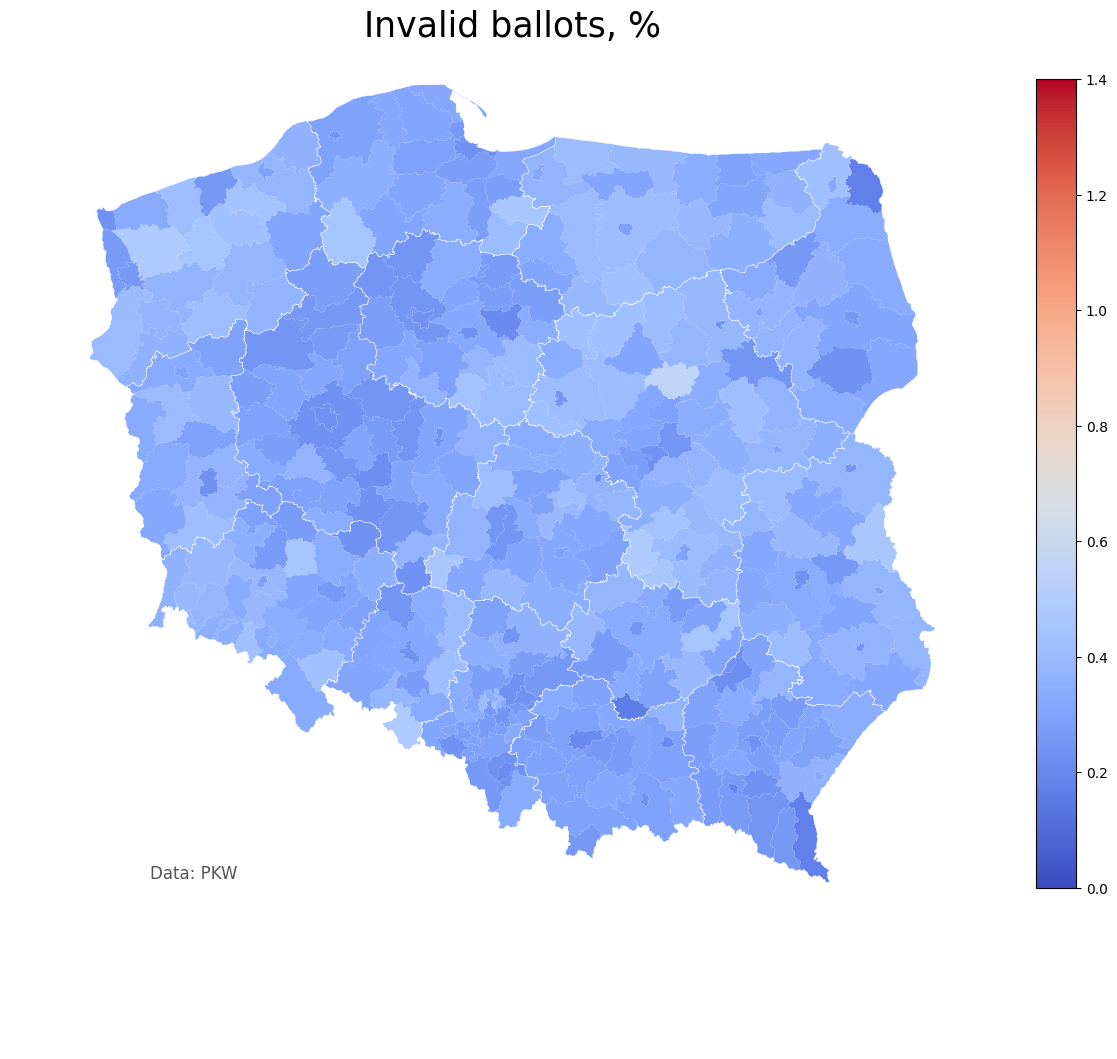

In [15]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Invalid ballots, %", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=1.4))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="% głosów nieważnych", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=1.4);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Invalid ballots 1st round", dpi=200, bbox_inches='tight')

Now, I'll do the same visualisation with all major candidates.

In [16]:
duda_vmax = float(df['Andrzej Sebastian DUDA'].max())
display(HTML(df.nlargest(3, "Andrzej Sebastian DUDA").to_html(columns=['Województwo', 'Powiat', 'Andrzej Sebastian DUDA'], index=False)))

Województwo,Powiat,Andrzej Sebastian DUDA
lubelskie,janowski,75.04
mazowieckie,przysuski,72.13
podkarpackie,brzozowski,72.13


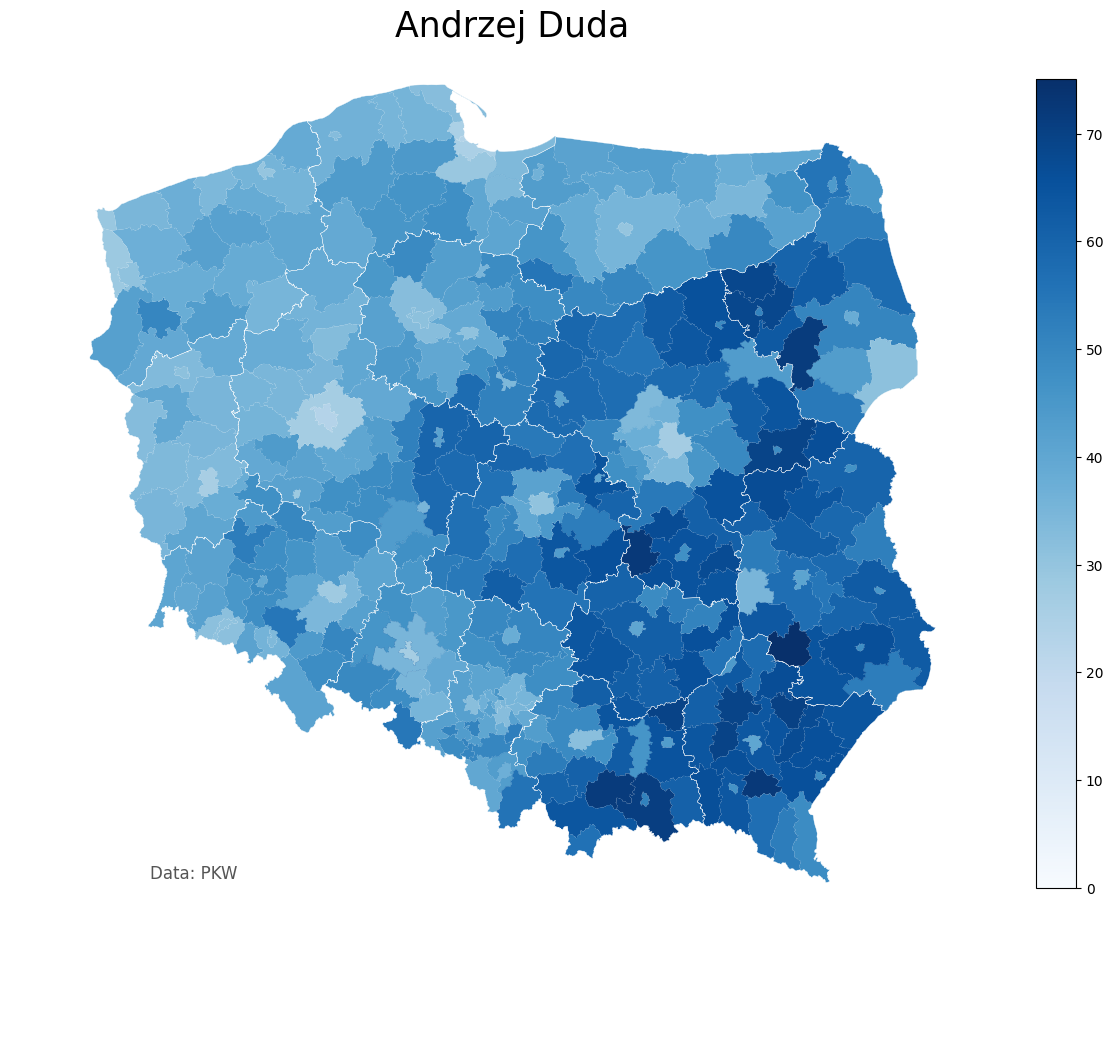

In [17]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Andrzej Duda", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Blues",
                           norm=plt.Normalize(vmin=0,vmax=duda_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Andrzej Sebastian DUDA", cmap="Blues", linewidth=0.1, ax=ax, vmin=0, vmax=duda_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Duda 1st round", dpi=200, bbox_inches='tight')

In [18]:
trz_vmax = float(df['Rafał Kazimierz TRZASKOWSKI'].max())
display(HTML(df.nlargest(3, "Rafał Kazimierz TRZASKOWSKI").to_html(columns=['Województwo', 'Powiat', 'Rafał Kazimierz TRZASKOWSKI'], index=False)))

Województwo,Powiat,Rafał Kazimierz TRZASKOWSKI
pomorskie,Sopot,52.83
pomorskie,Gdynia,47.97
mazowieckie,Warszawa,47.58


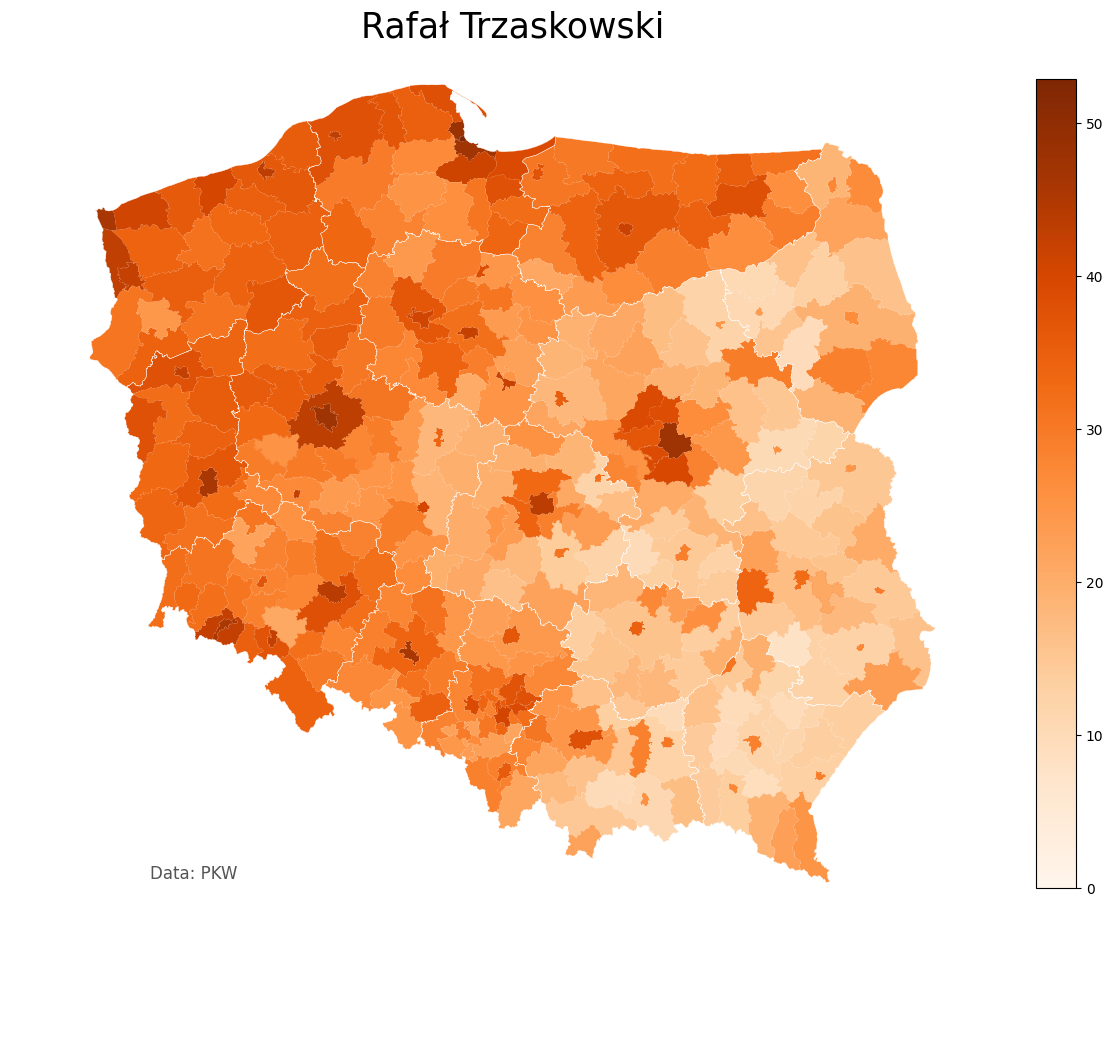

In [19]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Rafał Trzaskowski", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Oranges",
                           norm=plt.Normalize(vmin=0,vmax=trz_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Rafał Kazimierz TRZASKOWSKI", cmap="Oranges", linewidth=.1, ax=ax, vmin=0, vmax=trz_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Trzaskowski 1st round", dpi=200, bbox_inches='tight')

In [20]:
holow_vmax = float(df['Szymon Franciszek HOŁOWNIA'].max())
display(HTML(df.nlargest(3, "Szymon Franciszek HOŁOWNIA").to_html(columns=['Województwo', 'Powiat', 'Szymon Franciszek HOŁOWNIA'], index=False)))

Województwo,Powiat,Szymon Franciszek HOŁOWNIA
podlaskie,hajnowski,29.13
lubuskie,krosieński,22.99
opolskie,krapkowicki,22.45


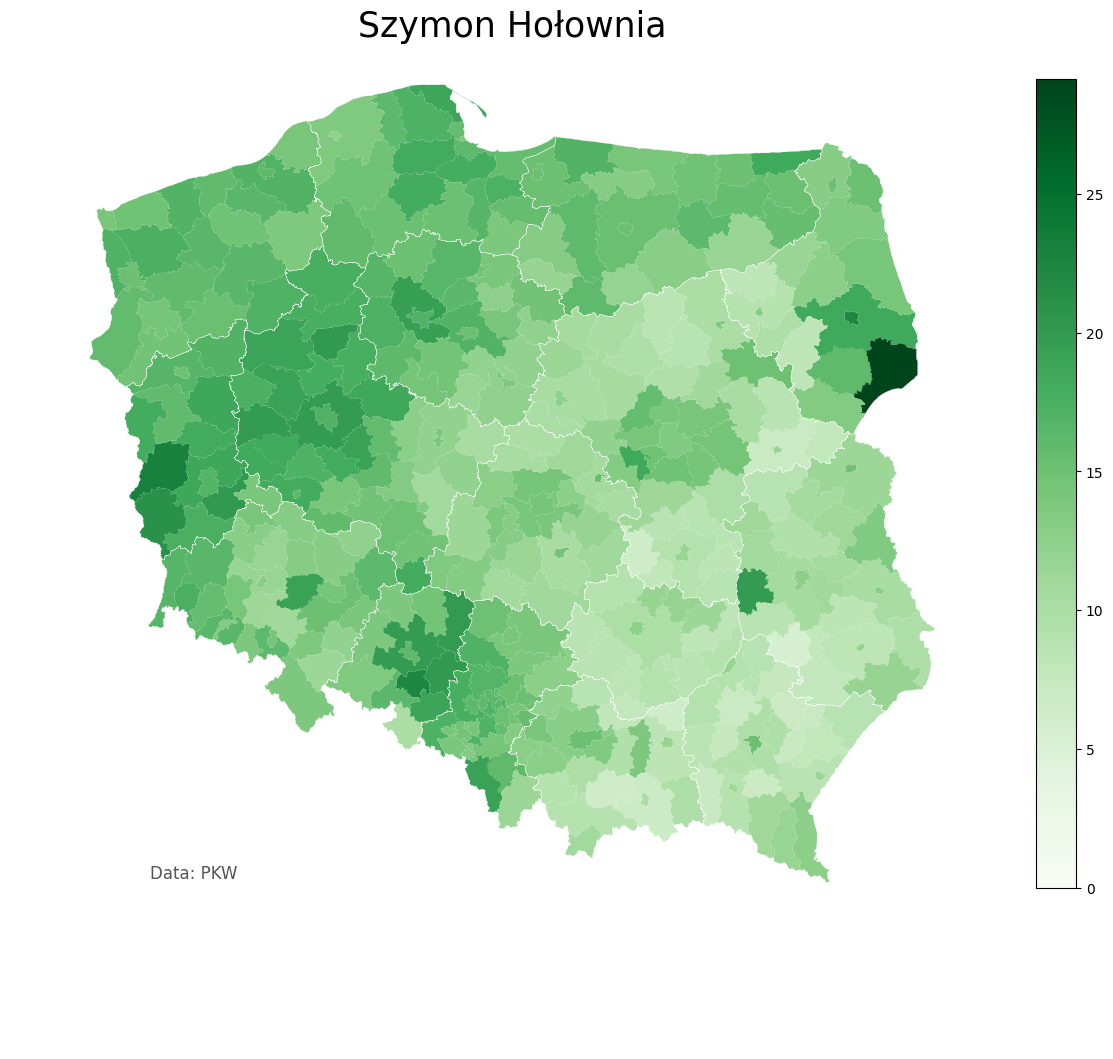

In [21]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Szymon Hołownia", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

sm = plt.cm.ScalarMappable(cmap="Greens",
                           norm=plt.Normalize(vmin=0,vmax=holow_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Szymon Franciszek HOŁOWNIA", cmap="Greens", linewidth=.1, ax=ax, vmin=0,vmax=holow_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Holownia 1st round", dpi=200, bbox_inches='tight')

In [22]:
bosak_vmax = float(df['Krzysztof BOSAK'].max())
display(HTML(df.nlargest(3, "Krzysztof BOSAK").to_html(columns=['Województwo', 'Powiat', 'Krzysztof BOSAK'], index=False)))

Województwo,Powiat,Krzysztof BOSAK
lubelskie,łęczyński,10.66
podkarpackie,rzeszowski,10.18
podkarpackie,Rzeszów,10.02


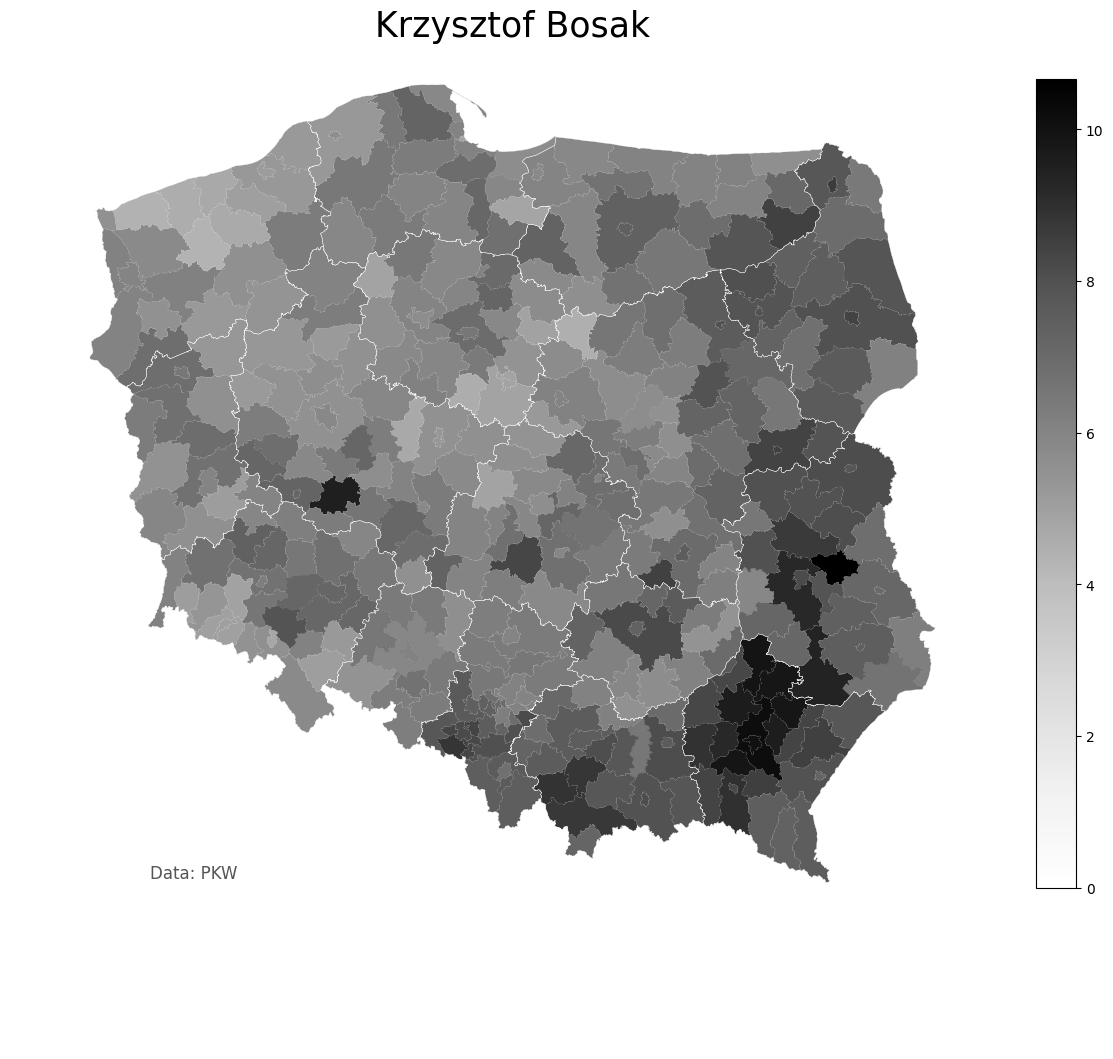

In [23]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Krzysztof Bosak", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Greys",
                           norm=plt.Normalize(vmin=0,vmax=bosak_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Krzysztof BOSAK", cmap="Greys", linewidth=.1, ax=ax, vmin=0, vmax=bosak_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Bosak 1st round", dpi=200, bbox_inches='tight')

In [24]:
kkamysz_vmax = float(df['Władysław Marcin KOSINIAK-KAMYSZ'].max())
display(HTML(df.nlargest(3, "Władysław Marcin KOSINIAK-KAMYSZ").to_html(columns=['Województwo', 'Powiat', 'Władysław Marcin KOSINIAK-KAMYSZ'], index=False)))

Województwo,Powiat,Władysław Marcin KOSINIAK-KAMYSZ
świętokrzyskie,sandomierski,6.36
świętokrzyskie,kazimierski,6.32
małopolskie,proszowicki,6.08


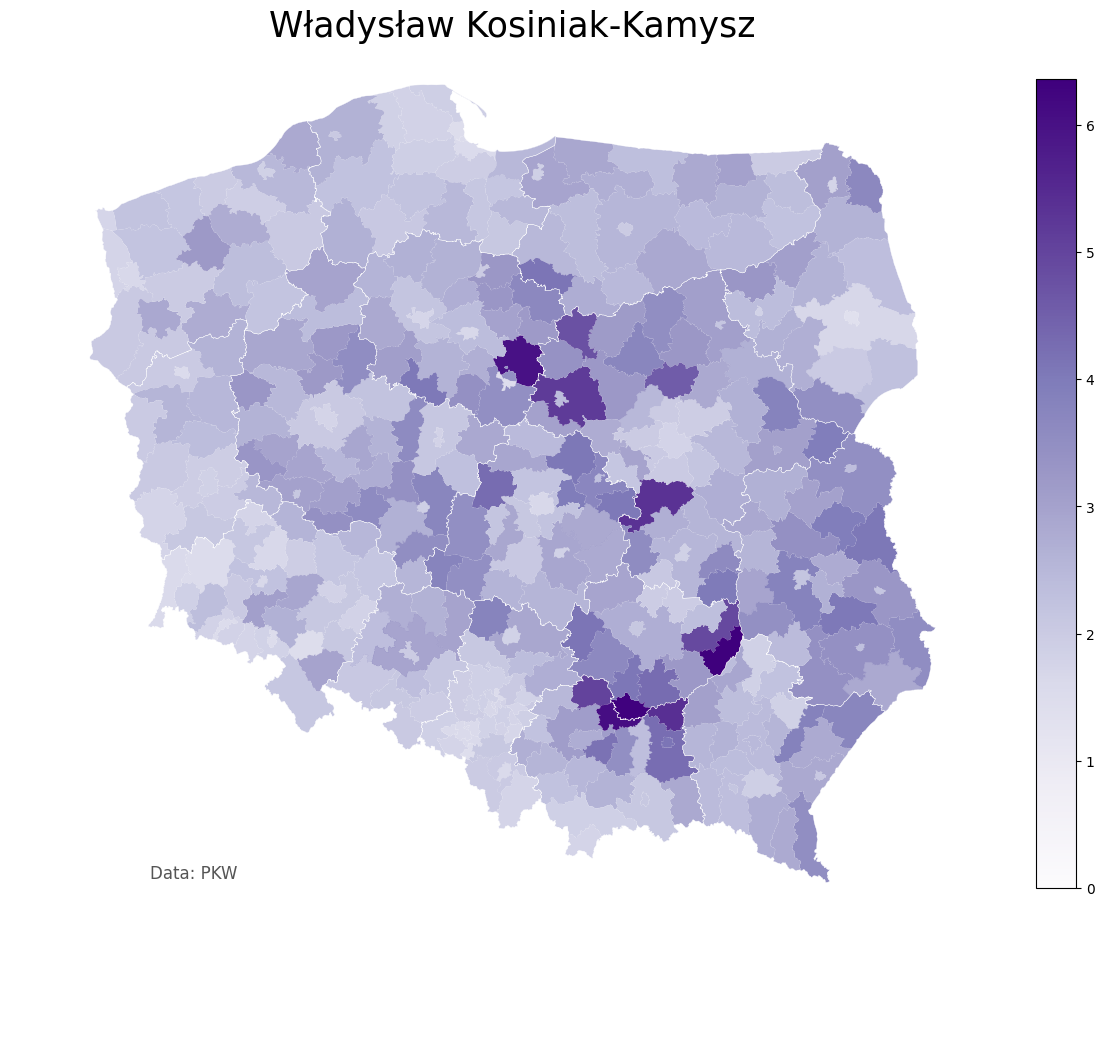

In [25]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Władysław Kosiniak-Kamysz", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Purples",
                           norm=plt.Normalize(vmin=0,vmax=kkamysz_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Władysław Marcin KOSINIAK-KAMYSZ", cmap="Purples", linewidth=.1, ax=ax, vmin=0, vmax=kkamysz_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Kamysz 1st round", dpi=200, bbox_inches='tight')

In [26]:
biedron_vmax = float(df['Robert BIEDROŃ'].max())
display(HTML(df.nlargest(3, "Robert BIEDROŃ").to_html(columns=['Województwo', 'Powiat', 'Robert BIEDROŃ'], index=False)))

Województwo,Powiat,Robert BIEDROŃ
dolnośląskie,Wrocław,3.91
wielkopolskie,Poznań,3.80
pomorskie,Słupsk,3.75


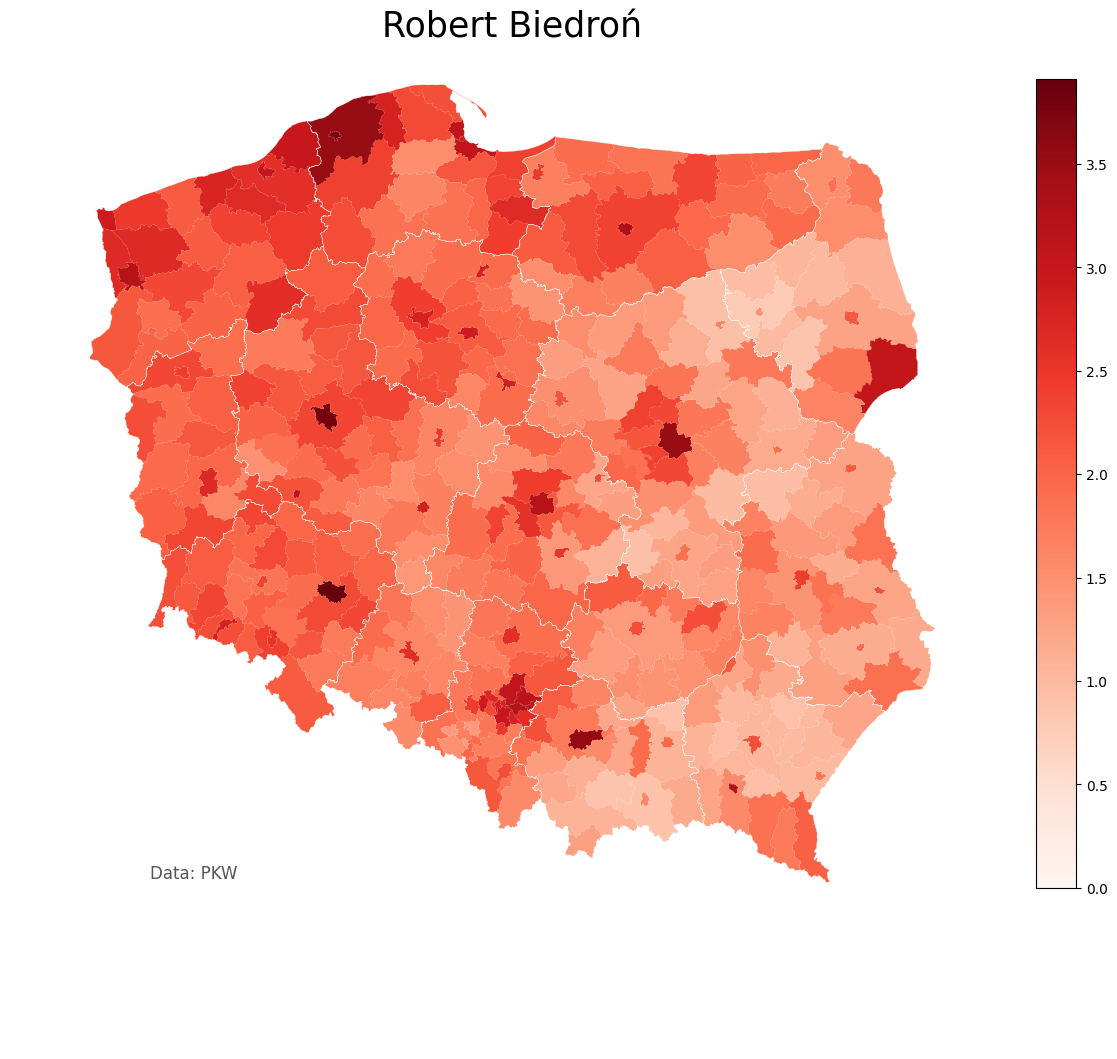

In [27]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Robert Biedroń", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

sm = plt.cm.ScalarMappable(cmap="Reds",
                           norm=plt.Normalize(vmin=0,vmax=biedron_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Robert BIEDROŃ", cmap="Reds", linewidth=.1, ax=ax, vmin=0, vmax=biedron_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Biedron 1st round", dpi=200, bbox_inches='tight')

In [28]:
def winning_fraction(row, candidates_a, candidates_b):
    if sum([row[cand] for cand in candidates_a]) > sum([row[cand] for cand in candidates_b]):
        return 0
    else: return 1

In [29]:
merged_df["WINNING_FRACTION"] = \
merged_df.apply(lambda row: winning_fraction(row, ["Rafał Kazimierz TRZASKOWSKI", "Szymon Franciszek HOŁOWNIA",
                                                   "Robert BIEDROŃ", "Władysław Marcin KOSINIAK-KAMYSZ", "Krzysztof BOSAK"],
                                             ["Andrzej Sebastian DUDA"]), axis=1)

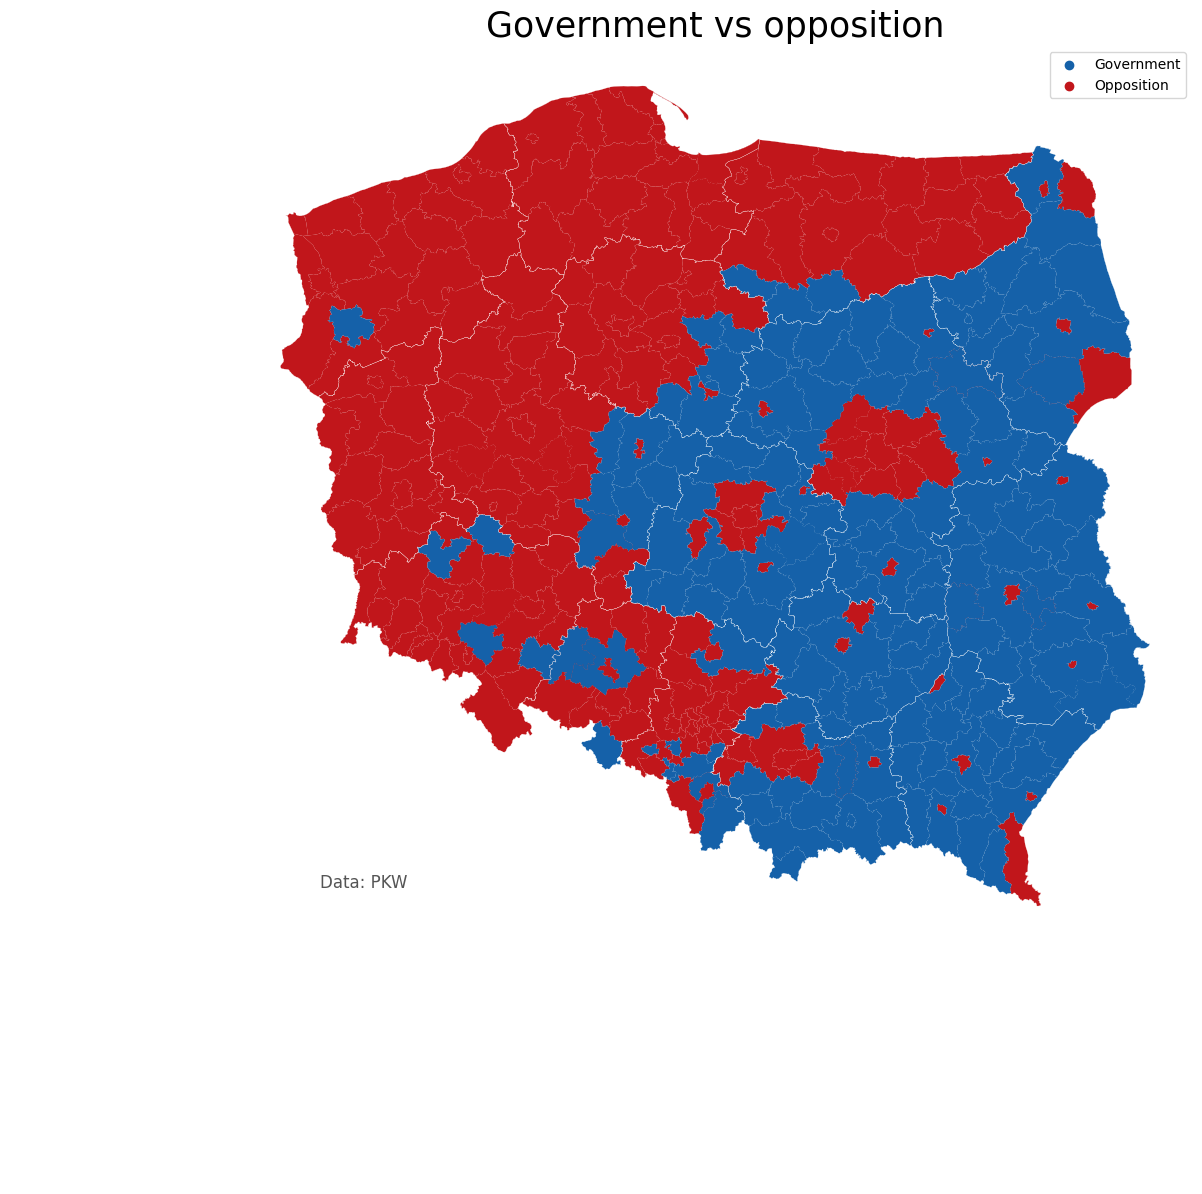

In [30]:
fractions = {0: '#C1161B',
          1: '#1561A9'}
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_title("Government vs opposition", fontdict={"fontsize": "25", "fontweight" : "3"})
divider = make_axes_locatable(ax)
ax.axis("off")
ax.annotate("Data: PKW",xy=(.16, .16),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

for fraction, color in fractions.items():
    merged_df[merged_df.WINNING_FRACTION==fraction].plot(color=color, linewidth=.0, ax=ax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.15);
cmap = ListedColormap(['#1561A9', '#C1161B'])
lbls = ["Government","Opposition"]
[ax.scatter([], [], color=cmap(i), label=lbls[i]) for i in range(2)]
ax.legend();
plt.savefig("Government vs opposition", dpi=200, bbox_inches='tight')